In [1]:
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
import numpy as np
import pandas as pd
from scipy import stats, sparse
import bottleneck
from scipy.stats import mannwhitneyu
import h5py
import h5py
import logging
import numpy as np
import pandas as pd
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
from scipy.sparse import csr_matrix, dia_matrix, triu, tril, coo_matrix
import scipy.stats as stats
import os.path


def calc_auroc (df_trial,predicted_score='predicted_score'):
    df_trial = df_trial.sort_values(by=[predicted_score], ascending=False)
    rank_abs = lambda x: stats.rankdata(x)
    predicts2 = np.apply_along_axis(rank_abs, 0, df_trial[predicted_score].values)
    df_trial['p'] = [y if x==1 else 0 for x,y in zip(df_trial['true_pos'], predicts2)]
    #print (df_trial['p'].sum())
    if df_trial['true_neg'].sum() == 0 or df_trial['true_pos'].sum() == 0:
        return np.nan
    else:
        return (((df_trial['p'].sum() /df_trial['true_pos'].sum() )- (df_trial['true_pos'].sum() + 1)/2)) / df_trial['true_neg'].sum()





INFO:numexpr.utils:Note: detected 192 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 192 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [96]:
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
import numpy as np
import pandas as pd
from scipy import stats, sparse
import bottleneck
from scipy.stats import mannwhitneyu
import h5py
import h5py
import logging
import numpy as np
import pandas as pd
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
from scipy.sparse import csr_matrix, dia_matrix, triu, tril, coo_matrix
import scipy.stats as stats
import os.path

In [1]:
import pandas as pd


In [25]:
df = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/1kbp_raw/max/spr/inter_only/hic_gene_corr_inter_excluding_intra_chrom_pairs_hicexp_1_percent_per_chr.csv', sep='\t')



In [26]:
df['auc'].mean()

0.6892774981236381

In [94]:
species = "mouse"
SRP_name = "aggregates"
resolution = "10kbp_raw"
resolution_human = 10000

In [18]:
with h5py.File(f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/hic_gene_gw_none_by_allbins_none_ranked_inter.h5', 'r') as hf:
    my_data = hf['matrix'][:]
    gene_list = hf['gene_list'][:]
    bins_bed = hf['bins_bed'][:]
    
    

In [19]:
predicts2 = my_data

In [20]:
    input_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/'
    bins_bed = pd.read_csv(f'{input_path}/all_bins.bed', names=['chr', 'start', 'end', 'bin_id'])
    bins_bed['bin_id'] = bins_bed.index
    bins_bed['pos'] = bins_bed['chr'] + '_' + bins_bed['start'].astype('str')

In [22]:
for filename, col_names, filepath in zip(['BICCN2'], [['AC','EX','IN','OG','OT']], ['output_BICCN2_gene_global_index__all_scanpy_obj_clust_ave_celltype.bed']):

       

    atac_file_path= f"/grid/gillis/data/lohia/ATAC_Risa/celltype/{filepath}"
    
    comple_col = ['chr', 'start', 'end']
    
    comple_col.extend(col_names)
    
    print (comple_col)

    df = pd.read_csv(atac_file_path, sep='\t|,', skiprows=1, names=comple_col)
    


    df['start_bin'] = df['start'] / resolution_human


    df['end_bin'] = df['end'] / resolution_human

    df['start_bin'] = df['start_bin'].astype(int)
    df['end_bin'] = df['end_bin'].astype(int)
    
    
    df['start_bin'] = df['start_bin']*resolution_human
    df['end_bin'] = df['end_bin']*resolution_human
   

    df_atac = df.groupby(['chr','start_bin'])[col_names].sum().reset_index()
    
    df_atac['chr'] = df_atac['chr'].astype('str')
    df_atac['chr'] = 'chr' + df_atac['chr']

    df_atac['start_bin'] = df_atac['chr'] + '_'+df_atac['start_bin'].astype(str) 
    
    #df_atac['EX'] = stats.rankdata(df_atac['EX']).tolist()
    #df_atac['IN'] = stats.rankdata(df_atac['IN']).tolist()
    

    df_atac['n'] = [((a+b)/2) for a,b in zip(df_atac['EX'].tolist(), df_atac['IN'].tolist())]
    #df_cre_tog['nn_rank'] = stats.rankdata(df_cre_tog['nn']).tolist()
    

    
    if 'AC' in col_names:
        #df_atac['AC'] = stats.rankdata(df_atac['AC']).tolist()
        #df_atac['OG'] = stats.rankdata(df_atac['OG']).tolist()
        df_atac['nn'] = [((a+b)/2) for a,b, in zip(df_atac['AC'].tolist(), df_atac['OG'].tolist())]
        #df_atac['nn_rank'] = stats.rankdata(df_atac['nn']).tolist()

    #df_atac.to_csv(f'{filename}_1kb.csv', index=False)
    
#df_cre_1kb_end = df_atac.merge(bins_bed, left_on='start_bin', right_on='pos')

['chr', 'start', 'end', 'AC', 'EX', 'IN', 'OG', 'OT']


<ipython-input-22-a5e3d77a4b20>:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(atac_file_path, sep='\t|,', skiprows=1, names=comple_col)


In [23]:
df_cre_1kb_end = df_atac.merge(bins_bed, left_on='start_bin', right_on='pos')

In [ ]:
    df_tmp = df_max_gene_inter_by_bins.T.reset_index()


    df_cre_tog = df_cre_1kb_encode.merge(df_tmp, left_on='bin_id', right_on='index', how='right')

    df_cre_tog['cre'] = df_cre_tog['cre'].fillna(0)


    df_cre_tog['true_pos'] =  [1.0 if x>=14 else 0 for x in df_cre_tog['cre']]

    df_cre_tog['true_neg'] = [0 if x == 1.0 else 1.0 for x in df_cre_tog['true_pos']]

    tp_arr = df_cre_tog['true_pos'].values
    tn_arr = df_cre_tog['true_neg'].values

    tp_list = []
    tn_list = []
    for i in gene_list:
        tp_list.append(tp_arr)
        tn_list.append(tn_arr)


    tp  = np.vstack(tp_list)
    tn  = np.vstack(tn_list)

    tp[np.isnan(my_data)] = np.nan
    tn[np.isnan(my_data)] = np.nan

    pos_rank_sum = tp * predicts2
    auc_array = (((np.nansum(pos_rank_sum, axis=1) / (np.nansum(tp, axis=1)) )- (np.nansum(tp, axis=1) + 1)/2)) / np.nansum(tn, axis=1)
    
    df = pd.DataFrame(columns = ['gene_id_exp_file', 'auc'])  
    df['auc'] = auc_array.tolist()
    df['gene_id_exp_file'] = gene_list
    

In [13]:
input_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/'
outfile_name = f'{input_path}/hic_gene_gw_none_by_allbins_none_ranked_inter.h5'

In [133]:
pd.read_csv(f'{input_path}/cre_auc_14.csv', sep='\t')['auc'].mean()

FileNotFoundError: [Errno 2] No such file or directory: '/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/10kbp_raw/max//cre_auc_14.csv'

In [118]:
species = "human"
SRP_name = "aggregates"
resolution = "5kbp_raw"
resolution_human = 10000

In [33]:
%matplotlib inline
import seaborn as sns

df_seq_depth = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_inter.txt', sep='\t')
contacts_path = f'/grid/gillis/data/nfox/hi_c_data_processing/data_{species}/stats/'
df_con = pd.read_csv(f'{contacts_path}/project_network_counts.txt', sep=' ', names=['id', 'count'])



empty_list_2 = []
empty_list_1 = []
for SRP_name in df_con['id'].tolist():
    
    try:

        input_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/'

        df = pd.read_csv(f'{input_path}/cre_auc_1.csv', sep='\t')
        empty_list_1.append(df['auc'].mean())
        df_seq_depth_subset = df_seq_depth[df_seq_depth['proj_id'].isin([SRP_name])]
        empty_list_2.append(df_seq_depth_subset['counts_inter'].sum())
    except:
        pass


for SRP_name in ['aggregates']:
    
    try:

        input_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/'

        df = pd.read_csv(f'{input_path}/cre_auc_1.csv', sep='\t')
        empty_list_1.append(df['auc'].mean())
        df_seq_depth_subset = df_seq_depth
        empty_list_2.append(df_seq_depth['counts_inter'].sum())
    except:
        pass

In [131]:
%matplotlib inline
import seaborn as sns

df_seq_depth = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_inter.txt', sep='\t')
contacts_path = f'/grid/gillis/data/nfox/hi_c_data_processing/data_{species}/stats/'
df_con = pd.read_csv(f'{contacts_path}/project_network_counts.txt', sep=' ', names=['id', 'count'])



empty_list_2 = []
empty_list_1 = []



for SRP_name in ['aggregates']:
 for resolution in ['10kbp_raw']:
    
    try:

        input_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/'

        df = pd.read_csv(f'{input_path}/cre_auc_4.csv', sep='\t')
        empty_list_1.append(df['auc'].mean())
        df_seq_depth_subset = df_seq_depth
        empty_list_2.append(resolution)
    except:
        pass

In [38]:
empty_list_1

[0.5511414643341456,
 0.6346230370225541,
 0.7093518882882045,
 -8.015816835014064]

<AxesSubplot:xlabel='auc', ylabel='Count'>

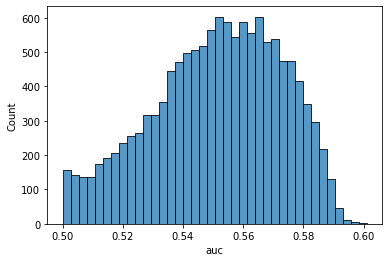

In [73]:
sns.histplot(df['auc'])

<AxesSubplot:xlabel='auc', ylabel='Count'>

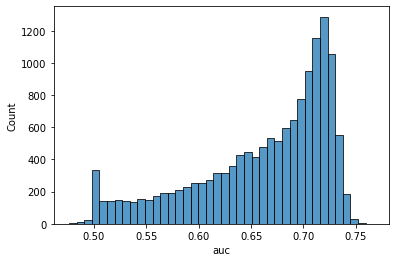

In [29]:
sns.histplot(df['auc'])

<AxesSubplot:xlabel='auc', ylabel='Count'>

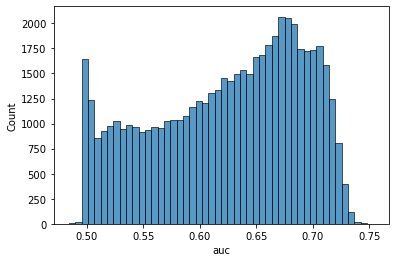

In [129]:
%matplotlib inline
import seaborn as sns
sns.histplot(df['auc'])

<AxesSubplot:xlabel='auc', ylabel='Count'>

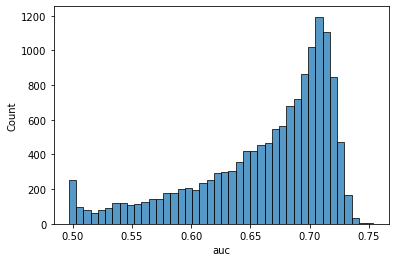

In [132]:
%matplotlib inline
import seaborn as sns
sns.histplot(df['auc'])

In [130]:
df['auc'].mean()

0.6235861294050655

In [60]:
df[df['auc'] > 0.7]

gene_id_exp_file       auc
7      ENSG00000144596  0.705338
10     ENSG00000029534  0.711764
12     ENSG00000154127  0.717764
17     ENSG00000077044  0.700086
27     ENSG00000105464  0.719767
...                ...       ...
14193  ENSG00000100029  0.711905
14194  ENSG00000169871  0.708096
14196  ENSG00000139531  0.703167
14200  ENSG00000172893  0.714028
14202  ENSG00000108828  0.708515

[4615 rows x 2 columns]

In [59]:
df

gene_id_exp_file       auc
0      ENSG00000128683  0.658004
1      ENSG00000155974  0.597118
2      ENSG00000157103  0.679008
3      ENSG00000136750  0.581956
4      ENSG00000171189  0.542760
...                ...       ...
14199  ENSG00000204622  0.502863
14200  ENSG00000172893  0.714028
14201  ENSG00000119630  0.699716
14202  ENSG00000108828  0.708515
14203  ENSG00000132017  0.697073

[14204 rows x 2 columns]

In [121]:
df

gene_id_exp_file       auc
0      ENSG00000000419  0.743815
1      ENSG00000000457  0.695914
2      ENSG00000000460  0.693674
3      ENSG00000000938  0.736562
4      ENSG00000000971  0.631942
...                ...       ...
55406  ENSG00000285498  0.615294
55407  ENSG00000285505  0.744162
55408  ENSG00000285508  0.716470
55409  ENSG00000285509  0.734282
55410  ENSG00000285513  0.678652

[55411 rows x 2 columns]

<AxesSubplot:xlabel='auc', ylabel='Count'>

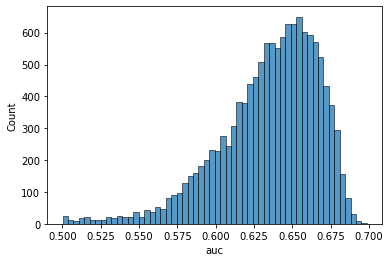

In [53]:
%matplotlib inline
import seaborn as sns
sns.histplot(df['auc'])

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

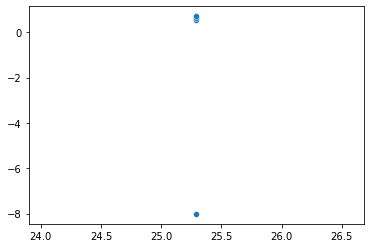

In [37]:
sns.scatterplot([np.log(x) for x in empty_list_2], empty_list_1)

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

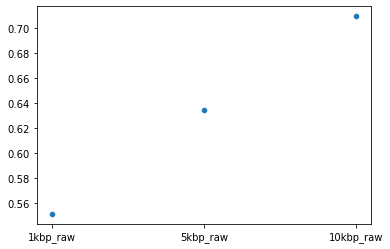

In [41]:
sns.scatterplot(empty_list_2, empty_list_1)

In [82]:
species='human'
resolution='10kbp_raw'

In [63]:
print (proj)

aggregates


In [83]:
    input_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/'
    bins_bed = pd.read_csv(f'{input_path}/all_bins.bed', names=['chr', 'start', 'end', 'bin_id'])
    bins_bed['bin_id'] = bins_bed.index
    bins_bed['pos'] = bins_bed['chr'] + '_' + bins_bed['start'].astype('str')

In [85]:
                with h5py.File(f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/{proj}/10kbp_raw/max/hic_inter_bins_mean_none.h5', 'r') as hf:
    
                     data =  (((hf['mean'][()])));
                df_max_gene_inter_by_bins = pd.DataFrame(data)
                df_max_gene_inter_by_bins['proj'] = proj
                df_max_gene_inter_by_bins = df_max_gene_inter_by_bins.reset_index()

                df_max_gene_inter_by_bins = df_max_gene_inter_by_bins.merge(bins_bed, left_on='index', right_on='bin_id')

                df_cre = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/li2022/GRCh38-dels.bed', sep='\t', names=['chr', 'start', 'end', 't1', 't2', 't3'])

                df_cre['start_bin'] = df_cre['start']/10000
                df_cre['start_bin'] = df_cre['start_bin'].astype('int')
                df_cre['start_bin'] = df_cre['start_bin']*10000
                df_cre['start_bin'] = df_cre['start_bin'].astype('str')
                df_cre['start_bin'] = df_cre['chr'] + '_' + df_cre['start_bin']
                #df_cre_1kb_encode = df_cre.drop_duplicates(subset=['start_bin'])
                df_cre['cre'] = 1
                df_cre = df_cre.groupby(['start_bin'])['cre'].sum().reset_index()
                df_cre_1kb_encode = df_cre.merge(bins_bed, left_on='start_bin', right_on='pos')
                



                

                df_cre_tog = df_cre_1kb_encode.merge(df_max_gene_inter_by_bins, left_on='pos', right_on='pos', how='right')

                df_cre_tog['cre'] = df_cre_tog['cre'].fillna(0)
                #df_cre_tog = df_cre_tog[~df_cre_tog['bin_id_y'].isin(gene_data['bin'].tolist())]
                
                df_cre_tog['true_pos'] =  [1 if x>=6 else 0 for x in df_cre_tog['cre']]
                
                df_cre_tog['true_neg'] = [0 if x == 1 else 1 for x in df_cre_tog['true_pos']]

                df_cre_tog['score'] = df_cre_tog[0]
                
                print (calc_auroc (df_cre_tog,predicted_score='score'))


                

0.7029376734504125


In [77]:
df_cre_tog

start_bin  cre chr_x  start_x  end_x  bin_id_x             pos  \
0             NaN  0.0   NaN      NaN    NaN       NaN          chr1_0   
1             NaN  0.0   NaN      NaN    NaN       NaN       chr1_1000   
2             NaN  0.0   NaN      NaN    NaN       NaN       chr1_2000   
3             NaN  0.0   NaN      NaN    NaN       NaN       chr1_3000   
4             NaN  0.0   NaN      NaN    NaN       NaN       chr1_4000   
...           ...  ...   ...      ...    ...       ...             ...   
2875007       NaN  0.0   NaN      NaN    NaN       NaN  chr22_50814000   
2875008       NaN  0.0   NaN      NaN    NaN       NaN  chr22_50815000   
2875009       NaN  0.0   NaN      NaN    NaN       NaN  chr22_50816000   
2875010       NaN  0.0   NaN      NaN    NaN       NaN  chr22_50817000   
2875011       NaN  0.0   NaN      NaN    NaN       NaN  chr22_50818000   

           index    0        proj  chr_y   start_y     end_y  bin_id_y  \
0              0  0.0  aggregates   chr1         0      1000         0   
1              1  0.0  aggregates   chr1      1000      2000         1   
2              2  0.0  aggregates   chr1      2000      3000         2   
3              3  0.0  aggregates   chr1      3000      4000         3   
4              4  0.0  aggregates   chr1      4000      5000         4   
...          ...  ...         ...    ...       ...       ...       ...   
2875007  2875007  0.0  aggregates  chr22  50814000  50815000   2875007   
2875008  2875008  0.0  aggregates  chr22  50815000  50816000   2875008   
2875009  2875009  0.0  aggregates  chr22  50816000  50817000   2875009   
2875010  2875010  0.0  aggregates  chr22  50817000  50818000   2875010   
2875011  2875011  0.0  aggregates  chr22  50818000  50818468   2875011   

         true_pos  true_neg  score  
0               0         1    0.0  
1               0         1    0.0  
2               0         1    0.0  
3               0         1    0.0  
4               0         1    0.0  
...           ...       ...    ...  
2875007         0         1    0.0  
2875008         0         1    0.0  
2875009         0         1    0.0  
2875010         0         1    0.0  
2875011         0         1    0.0  

[2875012 rows x 17 columns]

In [61]:
df_max_gene_inter_by_bins[0].max()

35.022517792147035

In [52]:
dg

0.5022137341816022

In [61]:
input_path = '/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/100kbp_raw/max'

In [82]:
chr_list = ['chr1', 'chr2', 'chr3']

In [83]:
                bins_bed = pd.read_csv(f'{input_path}/all_bins.bed', names=['chr', 'start', 'end', 'bin_id'])
                bins_bed['bin_id'] = bins_bed.index

                chrom_index_list = {}
                for chrom in chr_list:
                    st = bins_bed[bins_bed['chr'] == chrom]['bin_id'].tolist()[0]
                    en = bins_bed[bins_bed['chr'] == chrom]['bin_id'].tolist()[-1]
                    chrom_index_list[chrom] = list(range(st, en+1))

                gene_bed = pd.read_csv(f'{input_path}/all_gene.bed', names=['chr', 'start_bin', 'end_bin', 'gene'])
                #gene_bed = gene_bed.head(1000)
                



In [84]:
gene_bed

chr  start_bin  end_bin             gene
0       chr1          0        0  ENSG00000278267
1       chr1          1        1  ENSG00000233750
2       chr1          1        1  ENSG00000268903
3       chr1          1        1  ENSG00000269981
4       chr1          1        1  ENSG00000241860
...      ...        ...      ...              ...
23460  chr22        505      505  ENSG00000205559
23461  chr22        506      506  ENSG00000008735
23462  chr22        506      506  ENSG00000100299
23463  chr22        507      508  ENSG00000184319
23464  chr22        507      507  ENSG00000079974

[23465 rows x 4 columns]

In [85]:
                inter_index_pair_chrom_vs_chrom = {}
                counter = 0
                for chrom_i in chr_list:
                    counter = counter + 1
                    for chrom_j in chr_list:
                        inter_index_pair = []

                        for chrom in chr_list:
                            if chrom !=chrom_i:
                                 if chrom !=chrom_j:
                                        inter_index_pair.extend(chrom_index_list[chrom])
                        inter_index_pair_chrom_vs_chrom[f'{chrom_i}vs{chrom_j}'] = inter_index_pair

In [91]:
inter_index_pair_chrom_vs_chrom['chr2vschr3']

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [87]:
inter_index_pair_chrom_vs_chrom.keys()

dict_keys(['chr1vschr1', 'chr1vschr2', 'chr1vschr3', 'chr2vschr1', 'chr2vschr2', 'chr2vschr3', 'chr3vschr1', 'chr3vschr2', 'chr3vschr3'])

In [92]:
df_cre_1kb_encode

NameError: name 'df_cre_1kb_encode' is not defined

In [93]:
                df_cre = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/li2022/GRCh38-dels.bed', sep='\t', names=['chr', 'start', 'end', 't1', 't2', 't3'])

                df_cre['start_bin'] = df_cre['start']/10000
                df_cre['start_bin'] = df_cre['start_bin'].astype('int')
                df_cre['start_bin'] = df_cre['start_bin']*10000
                df_cre['start_bin'] = df_cre['start_bin'].astype('str')
                df_cre['start_bin'] = df_cre['chr'] + '_' + df_cre['start_bin']
                #df_cre_1kb_encode = df_cre.drop_duplicates(subset=['start_bin'])
                df_cre['cre'] = 1
                df_cre = df_cre.groupby(['start_bin'])['cre'].sum().reset_index()
                df_cre_1kb_encode = df_cre.merge(bins_bed, left_on='start_bin', right_on='pos')

KeyError: 'pos'

In [97]:
with h5py.File(f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/hic_gene_gw_none_by_allbins_none_ranked_inter.h5', 'r') as hf:
    my_data = hf['matrix'][:]
    gene_list = hf['gene_list'][:]
    bins_bed = hf['bins_bed'][:]

KeyboardInterrupt: 

In [98]:
species == 'human'

False

In [99]:
    if species == 'human':

        df_cre = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/li2022/GRCh38-cCREs.bed', sep='\t', names=['chr', 'start', 'end', 't1', 't2', 't3'])

    else:

        df_cre = pd.read_csv('/grid/gillis/data/lohia/ATAC_Risa/mm10-cCREs.bed', sep='\t', names=['chr', 'start', 'end', 't1', 't2', 't3'])

    df_cre['start_bin'] = df_cre['start']/resolution_human
    df_cre['start_bin'] = df_cre['start_bin'].astype('int')
    df_cre['start_bin'] = df_cre['start_bin']*resolution_human
    df_cre['start_bin'] = df_cre['start_bin'].astype('str')
    df_cre['start_bin'] = df_cre['chr'] + '_' + df_cre['start_bin']
    #df_cre_1kb_encode = df_cre.drop_duplicates(subset=['start_bin'])
    df_cre['cre'] = 1
    df_cre = df_cre.groupby(['start_bin'])['cre'].sum().reset_index()
    input_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/'
    bins_bed = pd.read_csv(f'{input_path}/all_bins.bed', names=['chr', 'start', 'end', 'bin_id'])
    bins_bed['bin_id'] = bins_bed.index
    bins_bed['pos'] = bins_bed['chr'] + '_' + bins_bed['start'].astype('str')
    df_cre_1kb_encode = df_cre.merge(bins_bed, left_on='start_bin', right_on='pos')
    
    

In [105]:
resolution

'10kbp_raw'

In [107]:
    input_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/'
    bins_bed = pd.read_csv(f'{input_path}/all_bins.bed', names=['chr', 'start', 'end', 'bin_id'])

In [108]:
bins_bed

chr     start       end  bin_id
0        chr1         0     10000       1
1        chr1     10000     20000       1
2        chr1     20000     30000       1
3        chr1     30000     40000       1
4        chr1     40000     50000       1
...       ...       ...       ...     ...
246280  chr19  61390000  61400000       1
246281  chr19  61400000  61410000       1
246282  chr19  61410000  61420000       1
246283  chr19  61420000  61430000       1
246284  chr19  61430000  61431566       1

[246285 rows x 4 columns]

In [110]:
bins_bed[bins_bed['chr'] == 'chr1']

chr      start        end  bin_id
0      chr1          0      10000       1
1      chr1      10000      20000       1
2      chr1      20000      30000       1
3      chr1      30000      40000       1
4      chr1      40000      50000       1
...     ...        ...        ...     ...
19543  chr1  195430000  195440000       1
19544  chr1  195440000  195450000       1
19545  chr1  195450000  195460000       1
19546  chr1  195460000  195470000       1
19547  chr1  195470000  195471971       1

[19548 rows x 4 columns]

In [111]:
bins_bed[bins_bed['chr'] == 'chr2']

chr      start        end  bin_id
19548  chr2          0      10000       1
19549  chr2      10000      20000       1
19550  chr2      20000      30000       1
19551  chr2      30000      40000       1
19552  chr2      40000      50000       1
...     ...        ...        ...     ...
37755  chr2  182070000  182080000       1
37756  chr2  182080000  182090000       1
37757  chr2  182090000  182100000       1
37758  chr2  182100000  182110000       1
37759  chr2  182110000  182113224       1

[18212 rows x 4 columns]

In [109]:
61390000/10000

6139.0

In [103]:
df_cre_1kb_encode

start_bin  cre    chr      start        end  bin_id  \
0       chr10_100010000    8  chr10  100010000  100020000  149520   
1       chr10_100030000    4  chr10  100030000  100040000  149522   
2       chr10_100050000    4  chr10  100050000  100060000  149524   
3       chr10_100060000    4  chr10  100060000  100070000  149525   
4       chr10_100070000    1  chr10  100070000  100080000  149526   
...                 ...  ...    ...        ...        ...     ...   
110287    chr9_99840000    1   chr9   99840000   99850000  137043   
110288    chr9_99860000    4   chr9   99860000   99870000  137045   
110289    chr9_99870000   13   chr9   99870000   99880000  137046   
110290    chr9_99950000    2   chr9   99950000   99960000  137054   
110291    chr9_99990000    2   chr9   99990000  100000000  137058   

                    pos  
0       chr10_100010000  
1       chr10_100030000  
2       chr10_100050000  
3       chr10_100060000  
4       chr10_100070000  
...                 ...  
110287    chr9_99840000  
110288    chr9_99860000  
110289    chr9_99870000  
110290    chr9_99950000  
110291    chr9_99990000  

[110292 rows x 7 columns]

In [106]:
100010000/10000

10001.0

In [116]:
chrom_index_list['chr1'] = [x for x in chrom_index_list['chr1'] if x in [2,5] ]

In [117]:
chrom_index_list['chr1']

[2, 5]